In [1]:
using DataFrames
using Gadfly
using Compose
set_default_plot_size(30cm, 12cm)

# LF

## minimization

In [2]:
dir_lf_min="/home/german/labo/17/2pdz/run/lf/mhe/m"
lf_min_Etot = readdlm("$dir_lf_min/outputs/Etot_min");
lf_mmin_Etot = readdlm("$dir_lf_min/outputs/Etot_mmin");
df_lf_MIN_Etot = DataFrame(E=[lf_min_Etot[:, 2]; lf_mmin_Etot[:, 2]],
NSTEP=[lf_min_Etot[:, 1]; (lf_mmin_Etot[:, 1] .+ 500)]);

LoadError: [91mSystemError: opening file /home/german/labo/17/2pdz/run/lf/mhe/m/outputs/Etot_min: No such file or directory[39m

In [3]:
plot(df_lf_MIN_Etot, Geom.line, x="NSTEP", y="E",
Coord.Cartesian(xmin=0, xmax=100),
Guide.title("Solvent minimization + solute minimization"),
Guide.xticks(ticks = collect(1:10:100)),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt, key_title_font_size = 30pt))

LoadError: [91mUndefVarError: df_lf_MIN_Etot not defined[39m

## heat

In [5]:
# Energies
dir_lf_hea="/home/german/labo/17/2pdz/run/lf/mhe/h"
lf_hea_Ek = readdlm("$dir_lf_hea/outputs/ektot.dat");
lf_hea_Ep = readdlm("$dir_lf_hea/outputs/eptot.dat");
lf_hea_Etot = readdlm("$dir_lf_hea/outputs/etot.dat");

df_lf_HEA_E = DataFrame(E=[lf_hea_Ek[:, 2]; lf_hea_Ep[:, 2]; lf_hea_Etot[:, 2]],
NSTEP=[lf_hea_Ek[:, 1]; lf_hea_Ep[:, 1]; lf_hea_Etot[:, 1]];
Type=repeat(["Ek"; "Ep"; "Etot"], inner=[length(lf_hea_Ek[:, 1])]));

# Temperature
lf_hea_T = readdlm("$dir_lf_hea/outputs/temp.dat");
df_lf_HEA_T = DataFrame(Temperature=lf_hea_T[:, 2],
NSTEP=lf_hea_T[:, 1]);

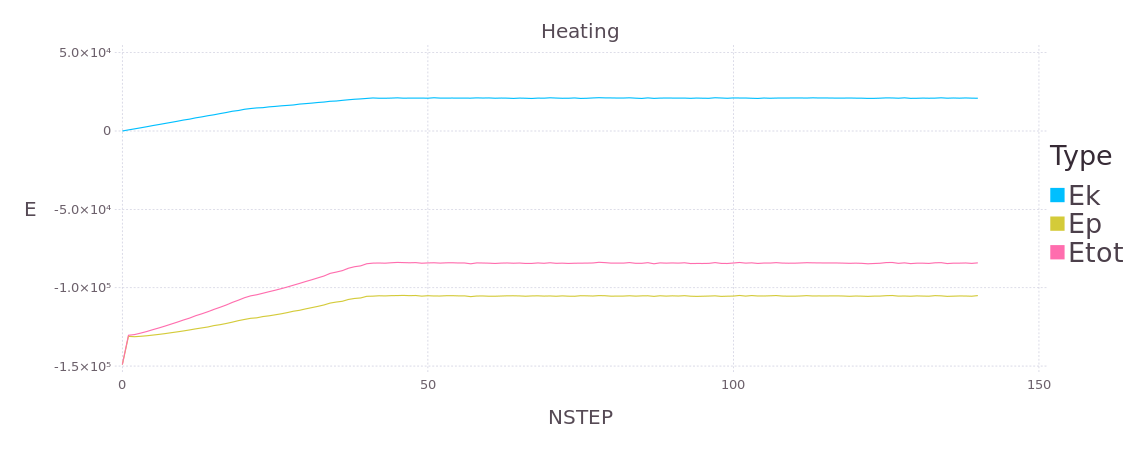

In [6]:
plot(df_lf_HEA_E, Geom.line, x="NSTEP", y="E", color="Type",
Guide.title("Heating"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

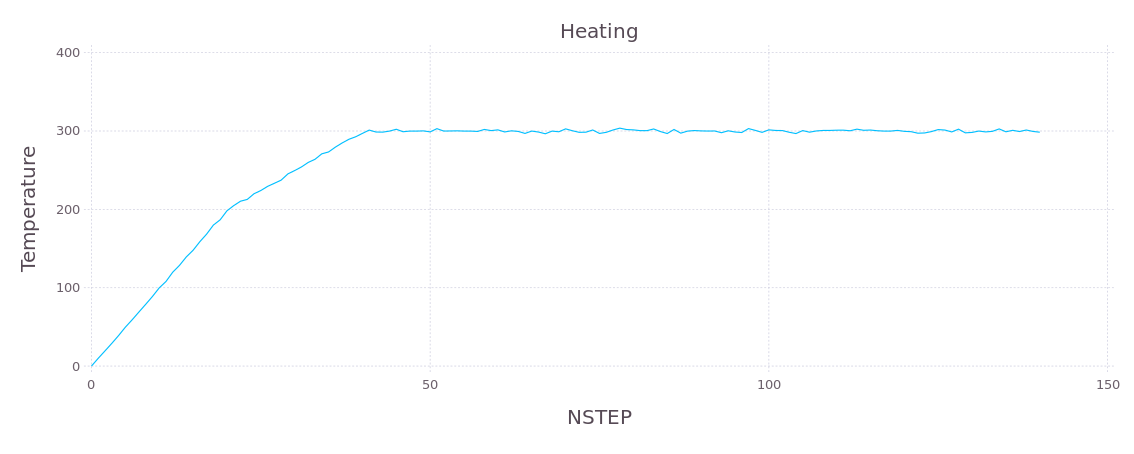

In [7]:
plot(df_lf_HEA_T, Geom.line, x="NSTEP", y="Temperature",
Guide.title("Heating"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

## equilibration

In [8]:
# Energies
dir_lf_equ="/home/german/labo/17/2pdz/run/lf/mhe/e"
lf_equ_Ek = readdlm("$dir_lf_equ/outputs/ektot.dat");
lf_equ_Ep = readdlm("$dir_lf_equ/outputs/eptot.dat");
lf_equ_Etot = readdlm("$dir_lf_equ/outputs/etot.dat");

df_lf_EQU_E = DataFrame(E=[lf_equ_Ek[:, 2]; lf_equ_Ep[:, 2]; lf_equ_Etot[:, 2]],
NSTEP=[lf_equ_Ek[:, 1]; lf_equ_Ep[:, 1]; lf_equ_Etot[:, 1]];
Type=repeat(["Ek"; "Ep"; "Etot"], inner=[length(lf_equ_Ek[:, 1])]));

# Temperature
lf_equ_T = readdlm("$dir_lf_equ/outputs/temp.dat");
df_lf_EQU_T = DataFrame(Temperature=lf_equ_T[:, 2],
NSTEP=lf_equ_T[:, 1]);

# RMSD ntwx=500
lf_equ_rmsd = readdlm("$dir_lf_equ/rmsd_equ_lf");
df_lf_EQU_RMSD = DataFrame(RMSD=lf_equ_rmsd[:, 2], Frame=lf_equ_rmsd[:, 1]);

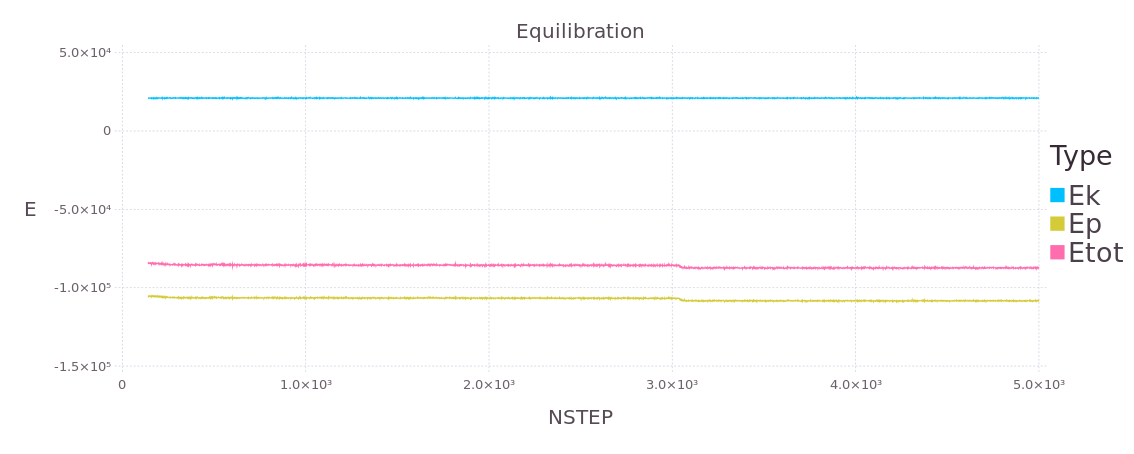

In [9]:
plot(df_lf_EQU_E, Geom.line, x="NSTEP", y="E", color="Type",
Guide.title("Equilibration"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

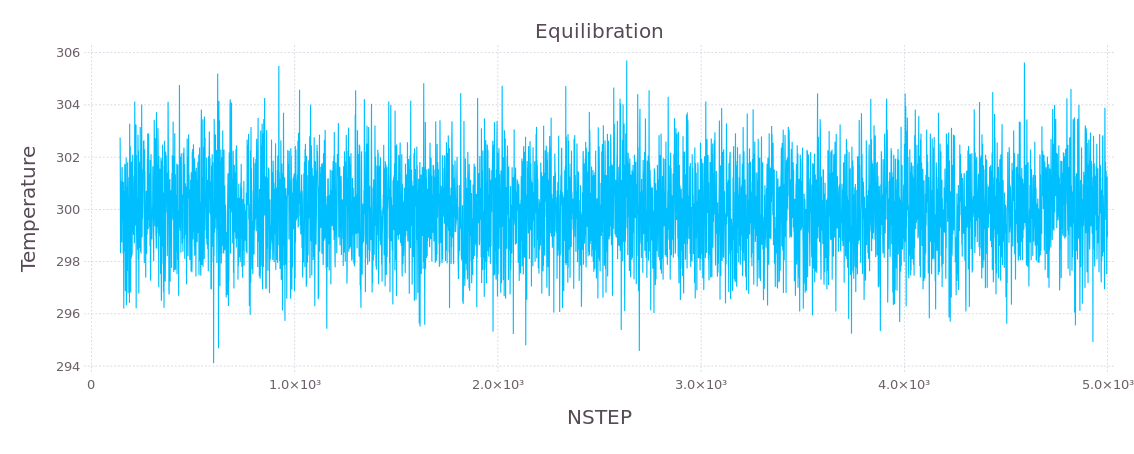

In [10]:
plot(df_lf_EQU_T, Geom.line, x="NSTEP", y="Temperature",
Guide.title("Equilibration"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

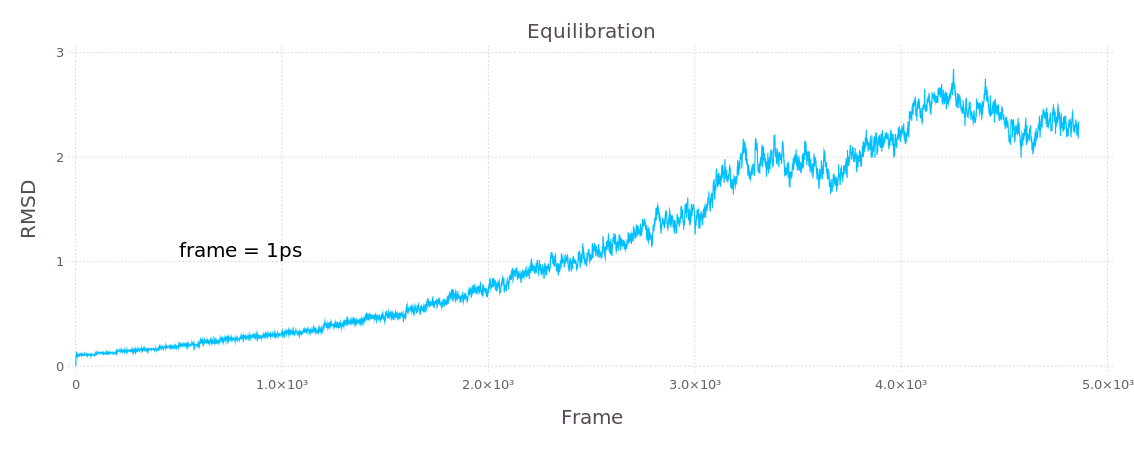

In [11]:
# Escribo c/ 1ps
plot(df_lf_EQU_RMSD, Geom.line, x="Frame", y="RMSD",
Guide.title("Equilibration"),
Guide.annotation(compose(compose(context(), text(500, 1.0, "frame = 1ps")), fontsize(15pt), fill("black"))),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

### production

# Energies
dir_lf_pdt = "/home/german/labo/17/2pdz/run/lf"
lf_pdt_Ek = readdlm("$dir_lf_pdt/data/outputs/ektot.dat");
lf_pdt_Ep = readdlm("$dir_lf_pdt/data/outputs/eptot.dat");
lf_pdt_Etot = readdlm("$dir_lf_pdt/data/outputs/etot.dat");
df_lf_PDT_E = DataFrame(E=[lf_pdt_Ek[:, 2]; lf_pdt_Ep[:, 2]; lf_pdt_Etot[:, 2]],
NSTEP=[lf_pdt_Ek[:, 1]; lf_pdt_Ep[:, 1]; lf_pdt_Etot[:, 1]];
Type=repeat(["Ek"; "Ep"; "Etot"], inner=[length(lf_pdt_Ek[:, 1])]));

# Temperature
lf_pdt_T = readdlm("$dir_lf_pdt/data/outputs/temp.dat");
df_lf_PDT_T = DataFrame(Temperature=lf_pdt_T[:, 2],
NSTEP=lf_pdt_T[:, 1]);

# RMSD 
lf_pdt_rmsd = readdlm("$dir_lf_pdt/data/rmsd_lf");
df_lf_PDT_RMSD = DataFrame(RMSD=lf_pdt_rmsd[:, 2], Frame=lf_pdt_rmsd[:, 1]);

plot(df_lf_PDT_E, Geom.line, x="NSTEP", y="E", color="Type",
Guide.title("Production"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))                                                        

plot(df_lf_PDT_T, Geom.line, x="NSTEP", y="Temperature",
Guide.title("Production"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

pdf_lf_PDT_RMSD = plot(df_lf_PDT_RMSD, Geom.line, x="Frame", y="RMSD",
Guide.title("Production"),
Guide.annotation(compose(compose(context(), text(70000, 3.5, "frame = 10ps")), fontsize(15pt), fill("black"))),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

# LB

## minimization

In [4]:
dir_lb_min="/home/german/labo/17/2pdz/run/lb/mhe/m"
lb_min_Etot = readdlm("$dir_lb_min/outputs/Etot_min");
lb_mmin_Etot = readdlm("$dir_lb_min/outputs/Etot_mmin");
df_lb_MIN_Etot = DataFrame(E=[lb_min_Etot[:, 2]; lb_mmin_Etot[:, 2]],
NSTEP=[lb_min_Etot[:, 1]; (lb_mmin_Etot[:, 1] .+ 500)]);

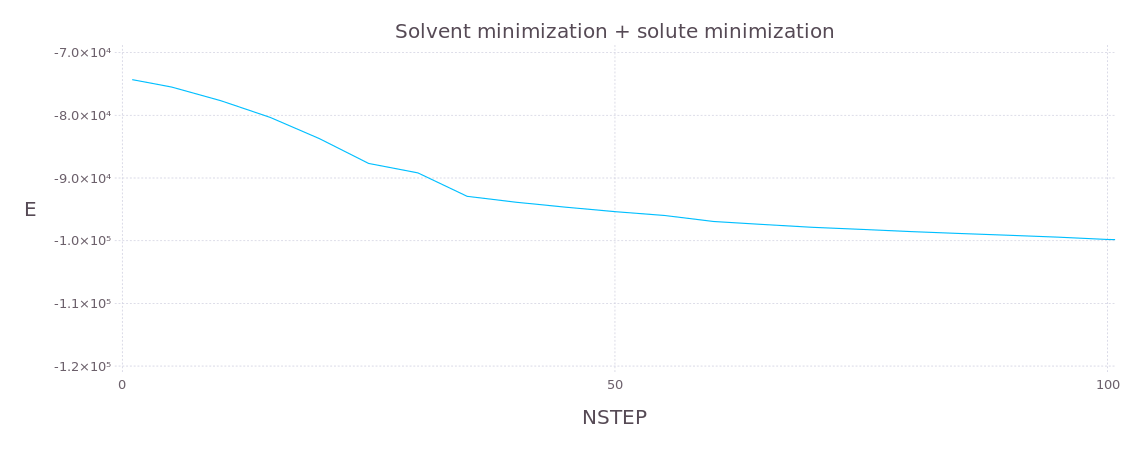

In [5]:
plot(df_lb_MIN_Etot, Geom.line, x="NSTEP", y="E",
Coord.Cartesian(xmin=0, xmax=100),
Guide.title("Solvent minimization + solute minimization"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt, key_title_font_size = 30pt))

## heat

In [6]:
# Energies
dir_lb_hea="/home/german/labo/17/2pdz/run/lb/mhe/h"
lb_hea_Ek = readdlm("$dir_lb_hea/outputs/ektot.dat");
lb_hea_Ep = readdlm("$dir_lb_hea/outputs/eptot.dat");
lb_hea_Etot = readdlm("$dir_lb_hea/outputs/etot.dat");

df_lb_HEA_E = DataFrame(E=[lb_hea_Ek[:, 2]; lb_hea_Ep[:, 2]; lb_hea_Etot[:, 2]],
NSTEP=[lb_hea_Ek[:, 1]; lb_hea_Ep[:, 1]; lb_hea_Etot[:, 1]];
Type=repeat(["Ek"; "Ep"; "Etot"], inner=[length(lb_hea_Ek[:, 1])]));

# Temperature
lb_hea_T = readdlm("$dir_lb_hea/outputs/temp.dat");
df_lb_HEA_T = DataFrame(Temperature=lb_hea_T[:, 2],
NSTEP=lb_hea_T[:, 1]);

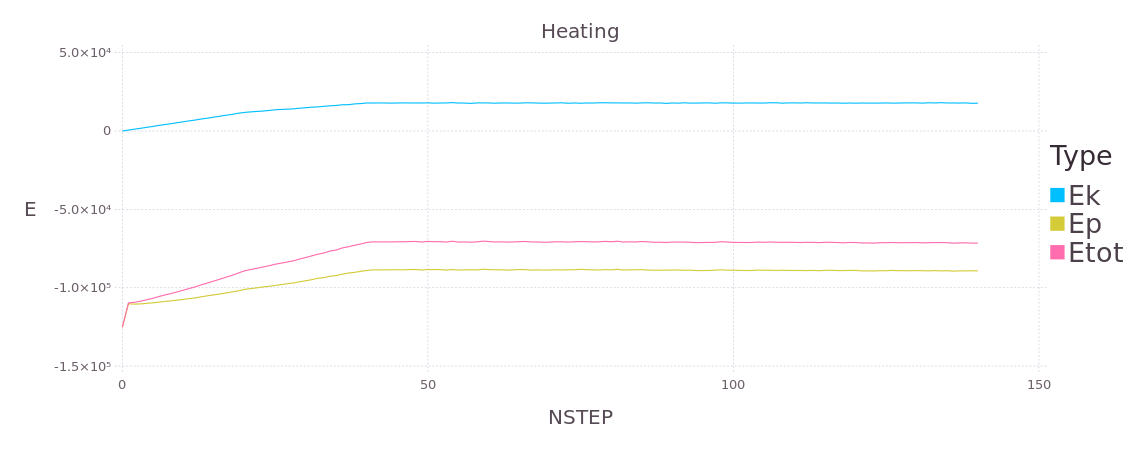

In [7]:
plot(df_lb_HEA_E, Geom.line, x="NSTEP", y="E", color="Type",
Guide.title("Heating"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

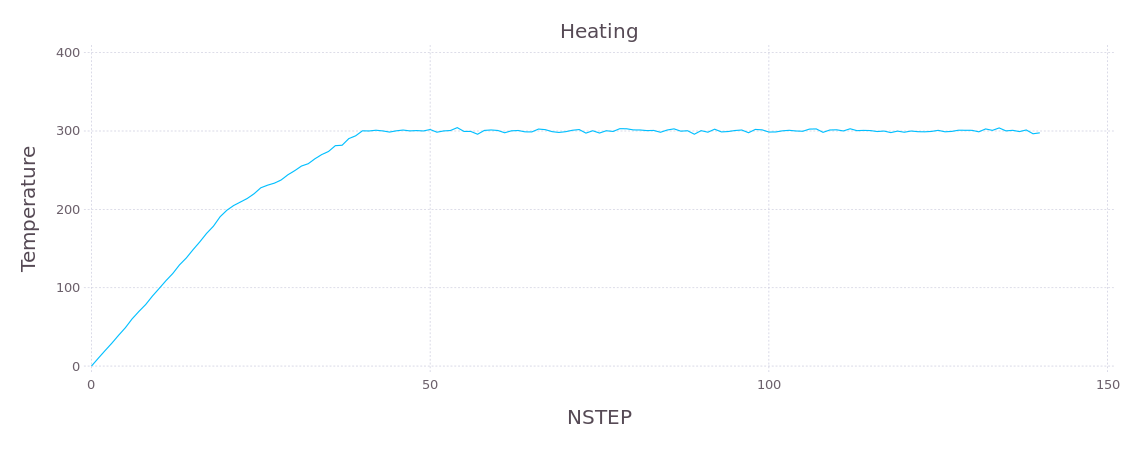

In [8]:
plot(df_lb_HEA_T, Geom.line, x="NSTEP", y="Temperature",
Guide.title("Heating"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

## equilibration

In [9]:
# Energies
dir_lb_equ="/home/german/labo/17/2pdz/run/lb/mhe/e"
lb_equ_Ek = readdlm("$dir_lb_equ/outputs/ektot.dat");
lb_equ_Ep = readdlm("$dir_lb_equ/outputs/eptot.dat");
lb_equ_Etot = readdlm("$dir_lb_equ/outputs/etot.dat");

df_lb_EQU_E = DataFrame(E=[lb_equ_Ek[:, 2]; lb_equ_Ep[:, 2]; lb_equ_Etot[:, 2]],
NSTEP=[lb_equ_Ek[:, 1]; lb_equ_Ep[:, 1]; lb_equ_Etot[:, 1]];
Type=repeat(["Ek"; "Ep"; "Etot"], inner=[length(lb_equ_Ek[:, 1])]));

# Temperature
lb_equ_T = readdlm("$dir_lb_equ/outputs/temp.dat");
df_lb_EQU_T = DataFrame(Temperature=lb_equ_T[:, 2],
NSTEP=lb_equ_T[:, 1]);

# RMSD ntwx=500
lb_equ_rmsd = readdlm("$dir_lb_equ/rmsd_equ_lb");
df_lb_EQU_RMSD = DataFrame(RMSD=lb_equ_rmsd[:, 2], Frame=lb_equ_rmsd[:, 1]);

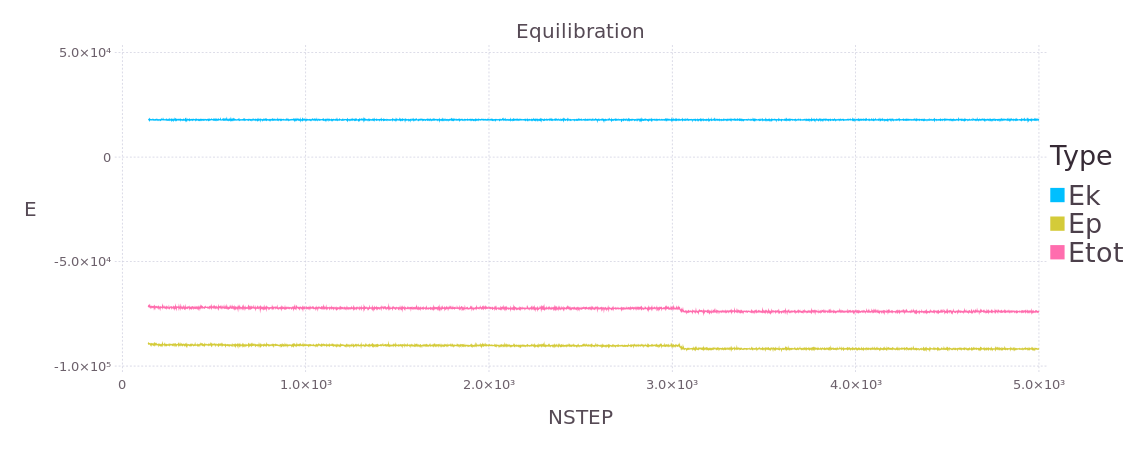

In [10]:
plot(df_lb_EQU_E, Geom.line, x="NSTEP", y="E", color="Type",
Guide.title("Equilibration"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

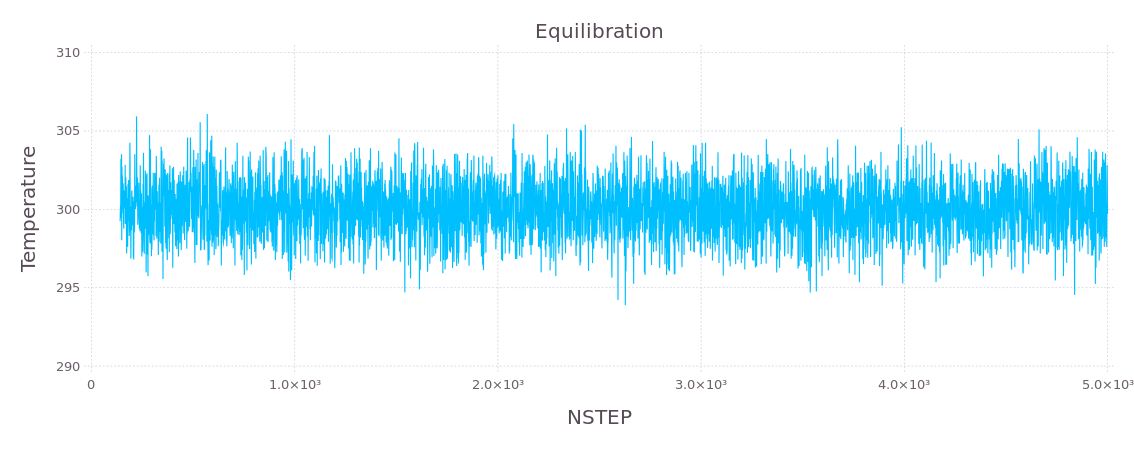

In [11]:
plot(df_lb_EQU_T, Geom.line, x="NSTEP", y="Temperature",
Guide.title("Equilibration"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

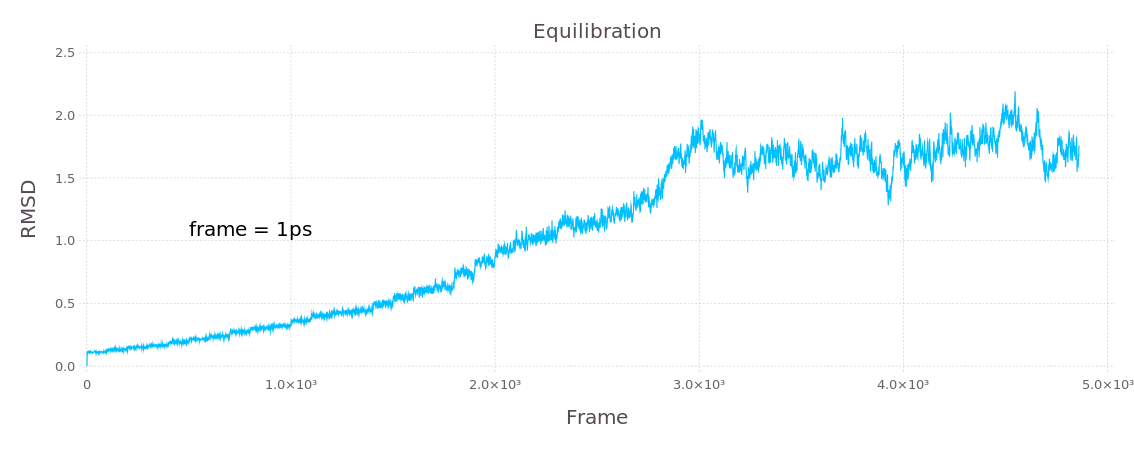

In [12]:
# Escribo c/ 1ps
plot(df_lb_EQU_RMSD, Geom.line, x="Frame", y="RMSD",
Guide.title("Equilibration"),
Guide.annotation(compose(compose(context(), text(500, 1.0, "frame = 1ps")), fontsize(15pt), fill("black"))),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

### production

In [13]:
# Energies
dir_lb_pdt = "/home/german/labo/17/2pdz/run/lb"
lb_pdt_Ek = readdlm("$dir_lb_pdt/data/outputs/ektot.dat");
lb_pdt_Ep = readdlm("$dir_lb_pdt/data/outputs/eptot.dat");
lb_pdt_Etot = readdlm("$dir_lb_pdt/data/outputs/etot.dat");
df_lb_PDT_E = DataFrame(E=[lb_pdt_Ek[:, 2]; lb_pdt_Ep[:, 2]; lb_pdt_Etot[:, 2]],
NSTEP=[lb_pdt_Ek[:, 1]; lb_pdt_Ep[:, 1]; lb_pdt_Etot[:, 1]];
Type=repeat(["Ek"; "Ep"; "Etot"], inner=[length(lb_pdt_Ek[:, 1])]));

# Temperature
lb_pdt_T = readdlm("$dir_lb_pdt/data/outputs/temp.dat");
df_lb_PDT_T = DataFrame(Temperature=lb_pdt_T[:, 2],
NSTEP=lb_pdt_T[:, 1]);

# RMSD 
lb_pdt_rmsd = readdlm("$dir_lb_pdt/data/rmsd_lb");
df_lb_PDT_RMSD = DataFrame(RMSD=lb_pdt_rmsd[:, 2], Frame=lb_pdt_rmsd[:, 1]);

LoadError: [91mSystemError: opening file /home/german/labo/17/2pdz/run/lb/data/outputs/ektot.dat: No such file or directory[39m

In [14]:
plot(df_lb_PDT_E, Geom.line, x="NSTEP", y="E", color="Type",
Guide.title("Production"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))                                                        

LoadError: [91mUndefVarError: df_lb_PDT_E not defined[39m

In [15]:
plot(df_lb_PDT_T, Geom.line, x="NSTEP", y="Temperature",
Guide.title("Production"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

LoadError: [91mUndefVarError: df_lb_PDT_T not defined[39m

In [16]:
pdf_lb_PDT_RMSD = plot(df_lb_PDT_RMSD, Geom.line, x="Frame", y="RMSD",
Guide.title("Production"),
Guide.annotation(compose(compose(context(), text(70000, 1.5, "frame = 10ps")), fontsize(15pt), fill("black"))),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

LoadError: [91mUndefVarError: df_lb_PDT_RMSD not defined[39m

### production nonrestrained

In [17]:
# Energies
dir_lb_pdt = "/home/german/labo/17/2pdz/run/lb"
lb_pdt_Ek = readdlm("$dir_lb_pdt/non_restrained_data/outputs/ektot.dat");
lb_pdt_Ep = readdlm("$dir_lb_pdt/non_restrained_data/outputs/eptot.dat");
lb_pdt_Etot = readdlm("$dir_lb_pdt/non_restrained_data/outputs/etot.dat");
df_lb_PDT_E = DataFrame(E=[lb_pdt_Ek[:, 2]; lb_pdt_Ep[:, 2]; lb_pdt_Etot[:, 2]],
NSTEP=[lb_pdt_Ek[:, 1]; lb_pdt_Ep[:, 1]; lb_pdt_Etot[:, 1]];
Type=repeat(["Ek"; "Ep"; "Etot"], inner=[length(lb_pdt_Ek[:, 1])]));

# Temperature
lb_pdt_T = readdlm("$dir_lb_pdt/non_restrained_data/outputs/temp.dat");
df_lb_PDT_T = DataFrame(Temperature=lb_pdt_T[:, 2],
NSTEP=lb_pdt_T[:, 1]);

# RMSD 
lb_pdt_rmsd = readdlm("$dir_lb_pdt/non_restrained_data/rmsd_lb");
df_lb_PDT_RMSD = DataFrame(RMSD=lb_pdt_rmsd[:, 2], Frame=lb_pdt_rmsd[:, 1]);

LoadError: [91mSystemError: opening file /home/german/labo/17/2pdz/run/lb/non_restrained_data/outputs/ektot.dat: No such file or directory[39m

In [18]:
plot(df_lb_PDT_E, Geom.line, x="NSTEP", y="E", color="Type",
Guide.title("Production"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))                                                        

LoadError: [91mUndefVarError: df_lb_PDT_E not defined[39m

In [19]:
plot(df_lb_PDT_T, Geom.line, x="NSTEP", y="Temperature",
Guide.title("Production"),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

LoadError: [91mUndefVarError: df_lb_PDT_T not defined[39m

In [20]:
pdf_lb_PDT_RMSD = plot(df_lb_PDT_RMSD, Geom.line, x="Frame", y="RMSD",
Guide.title("Production"),
Guide.annotation(compose(compose(context(), text(70000, 1.5, "frame = 10ps")), fontsize(15pt), fill("black"))),
Theme(minor_label_font_size = 10pt, major_label_font_size = 15pt,
key_title_font_size=20pt, key_label_font_size=20pt))

LoadError: [91mUndefVarError: df_lb_PDT_RMSD not defined[39m